#  Principal Component Analysis (PCA)

We will use the MNIST (Modified National Institute of Standards and Technology) database (http://yann.lecun.com/exdb/mnist/) of handwritten digits. It is a subset of a larger set available from NIST. 

Each digit has 64 pixels (8 by 8). Each pixel can be used as a predictor variable, and the number written can be used as the target variable.


## Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
%matplotlib inline


## Load the data



In [2]:
from sklearn.datasets import load_digits # built-in data of sklearn
digits = load_digits()
digits.data.shape # show the dimension 


(1797, 64)

In [3]:
# create the dataset with labels (y-variable, the written number in this case) and features (64 x-variables)
# label: digit
# 64 pixels -> 64 x-variables (each var is a pixel, and the value represents the darkness)
features = pd.DataFrame(digits.data)
labels = pd.DataFrame(digits.target, columns=['label']) # label is the value of the target var
data = pd.concat([labels, features], axis=1)
data

,label,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


## PCA: Get cumulative explained variance for a particular number of components

In [4]:
# extract x and y vars 
X = data.iloc[:,1:] # all rows, columns 1 and onwards
y = data.iloc[:,0] # all rows, column 0

# define and fit PCA, set n_components (e.g. 10)
pca = PCA(n_components = 10, random_state = 101).fit(X) 

# pca.explained_variance_ratio_ gives var explained by each PC
# use np.sum() to add it up to get cumulative var explained
np.sum(pca.explained_variance_ratio_)


0.7382246704530826

## PCA: Choose the number of components


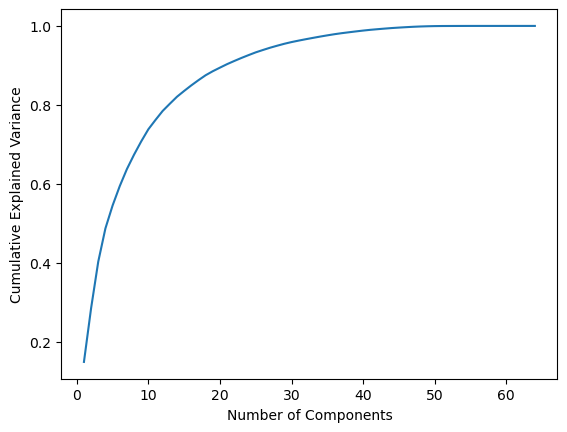

In [5]:
# extract x and y vars 
X = data.iloc[:,1:] # all rows, columns 1 and onwards
y = data.iloc[:,0] # all rows, column 0

# if n_components is not set, then PCA will run for every possible # of components (1 to 64 here)
pca = PCA(random_state = 101).fit(X) 

components = list(range(1, X.shape[1]+1)) # get a list of # of components
cumulative_var = np.cumsum(pca.explained_variance_ratio_) # use np.cumsum function to calculate cumulative var by # of components

plt.plot(components, cumulative_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');


## PCA: Reduce dimensionality and calculate new values based on principal components


In [6]:
# extract x and y vars 
X = data.iloc[:,1:] # all rows, columns 1 and onwards
y = data.iloc[:,0] # all rows, column 0

pca = PCA(n_components = 2, random_state = 101) # choose # of principal components (e.g. 2)

# fit PCA to data 
pca.fit(X) 

# transform x-vars using PCs -> reduce 64 x-vars to 2 
projected = pca.transform(X) 

# format the results into a dataframe
projected_variables = pd.DataFrame(projected)
data2 = pd.concat([labels, projected_variables], axis=1)
data2.head()


,label,0,1
0,0,-1.259467,21.274883
1,1,7.957611,-20.768700
2,2,6.991924,-9.955985
3,3,-15.906106,3.332464
4,4,23.306867,4.269061


In [7]:
print(data.iloc[:,1:].shape)
print(data2.iloc[:,1:].shape) 

(1797, 64)
(1797, 2)


## Make predictions with PCA components

components: 1 , accuracy: 0.35185185185185186
components: 2 , accuracy: 0.6111111111111112
components: 3 , accuracy: 0.6814814814814815
components: 4 , accuracy: 0.7944444444444444
components: 5 , accuracy: 0.8444444444444444
components: 6 , accuracy: 0.8574074074074074
components: 7 , accuracy: 0.8814814814814815
components: 8 , accuracy: 0.8962962962962963
components: 9 , accuracy: 0.9185185185185185
components: 10 , accuracy: 0.9296296296296296
components: 11 , accuracy: 0.9333333333333333
components: 12 , accuracy: 0.9351851851851852
components: 13 , accuracy: 0.9444444444444444
components: 14 , accuracy: 0.9407407407407408
components: 15 , accuracy: 0.9425925925925925
components: 16 , accuracy: 0.9388888888888889
components: 17 , accuracy: 0.95
components: 18 , accuracy: 0.95
components: 19 , accuracy: 0.9444444444444444
components: 20 , accuracy: 0.9462962962962963
components: 21 , accuracy: 0.9425925925925925
components: 22 , accuracy: 0.9555555555555556
components: 23 , accurac

Text(0.5, 1.0, 'Accuracy vs. # of Principal Components')

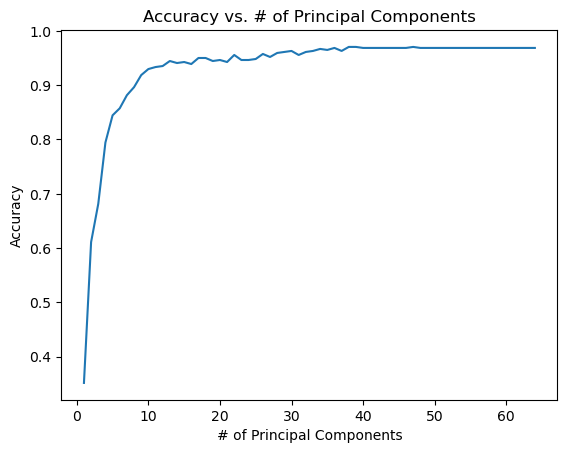

In [8]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

accuracies = [] # compare accuracies for using diff # of components
components = list(range(1, X.shape[1]+1)) # a list of 1 to 64 

for i in range(1, X.shape[1]+1): # loop through 1 to 64 
    
    # define PCA
    pca = PCA(n_components = i, random_state = 101) 
    
    # fit PCA to data
    pca.fit(X)
    
    # transform x-vars using PCs -> reduce 64 x-vars to i x-vars
    projected = pca.transform(X)
    projected_variables = pd.DataFrame(projected)
    
    # new data with dimensionality reduction
    data2 = pd.concat([labels, projected_variables], axis=1)
    
    # extract new x-vars after dimensionality reduction
    X2 = data2.iloc[:,1:]
    y2 = data2.iloc[:,0]
    
    # split data into train/test data
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state = 101)
    
    # use solver = 'lbfgs', multi_class = 'multinomial' b/c we have multiple categories for target var
    model = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 5000)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)

    accuracies.append(acc)
    
    print('components:', i, ', accuracy:', acc)

plt.plot(components, accuracies)
plt.ylabel('Accuracy')
plt.xlabel('# of Principal Components')
plt.title('Accuracy vs. # of Principal Components')
